# Histograms, Binnings, and Density

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

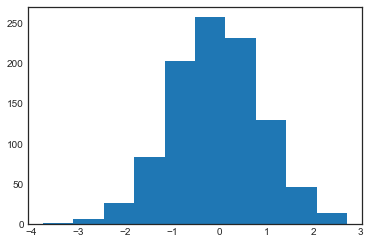

In [4]:
plt.hist(data);

In [5]:
?plt.hist

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*,...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.

P

(array([ 1.,  0.,  1.,  0.,  3.,  3.,  7.,  9., 11., 15., 26., 43., 54.,
        71., 78., 96., 94., 67., 77., 77., 77., 50., 50., 30., 19., 18.,
         9.,  7.,  6.,  1.]),
 array([-3.75652291, -3.54074405, -3.32496519, -3.10918633, -2.89340747,
        -2.67762862, -2.46184976, -2.2460709 , -2.03029204, -1.81451318,
        -1.59873432, -1.38295547, -1.16717661, -0.95139775, -0.73561889,
        -0.51984003, -0.30406118, -0.08828232,  0.12749654,  0.3432754 ,
         0.55905426,  0.77483312,  0.99061197,  1.20639083,  1.42216969,
         1.63794855,  1.85372741,  2.06950626,  2.28528512,  2.50106398,
         2.71684284]),
 <a list of 1 Patch objects>)

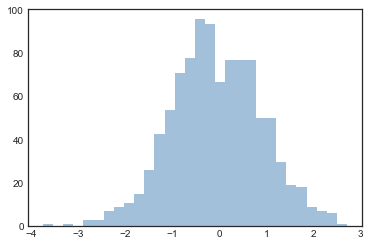

In [7]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

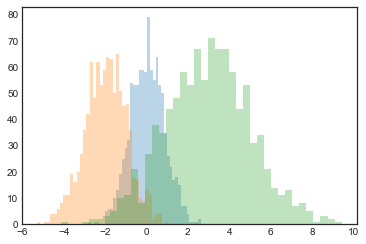

In [11]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [13]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[  8 111 460 361  60]


## Two-Dimensional Histograms and Binnings

In [14]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### plt.hist2d: Two-dimensional histogram

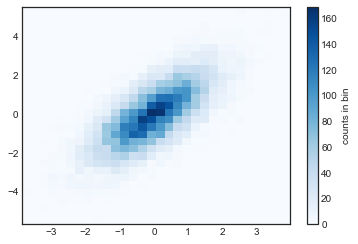

In [15]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [16]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### plt.hexbin: Hexagonal binnings

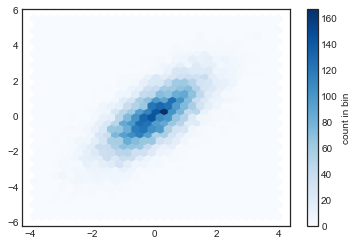

In [17]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation

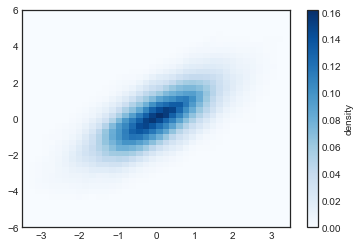

In [18]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")